<h1 style="text-align:center"> L'alghorithme K-means (En R)</h1>

Ce lab sert d'introduction à la méthode de clustering k-means.

* Exigences de réplication : ce dont vous aurez besoin pour reproduire l'analyse dans ce didacticiel
* Préparation des données : Préparation de nos données pour l'analyse de cluster
* Clustering Distance Measures : Comprendre comment mesurer les différences dans les observations
* K-Means Clustering : Calculs et méthodes de création de K sous-groupes de données
* Détermination des clusters optimaux : Identifier le bon nombre de clusters pour regrouper vos données


<h1>Exigences de réplication</h1>

Pour reproduire l'analyse de ce lab, vous devrez charger les packages suivants :

In [ ]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.5     v purrr   0.3.2
v tibble  3.1.1     v dplyr   1.0.6
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


<h1>Préparation des données</h1>

Pour effectuer une analyse de cluster dans R, généralement, les données doivent être préparées comme suit :

* Les lignes sont des observations (individus) et les colonnes sont des variables
* Toute valeur manquante dans les données doit être supprimée ou estimée.
* Les données doivent être standardisées (c'est-à-dire mises à l'échelle) pour rendre les variables comparables. Rappelons que la standardisation consiste à transformer les variables de telle sorte qu'elles aient une moyenne nulle et un écart-type un. 1

Ici, nous utiliserons l'ensemble de données R intégré USArrests, qui contient des statistiques sur les arrestations pour 100 000 habitants pour agression, meurtre et viol dans chacun des 50 États américains en 1973. Il comprend également le pourcentage de la population vivant en milieu urbain domaine

In [ ]:
df <- USArrests
head(df,10)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


Pour supprimer toute valeur manquante pouvant être présente dans les données, saisissez ceci :

In [ ]:
df <- na.omit(df)

Comme nous ne voulons pas que l'algorithme de clustering dépende d'une unité variable arbitraire, nous commençons par mettre à l'échelle/normaliser les données à l'aide de la fonction R scale:

In [ ]:
df <- scale(df)
head(df)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


## Clustering Distance Measures

Dans R, il est simple de calculer et de visualiser la matrice de distance à l'aide des fonctions get_distet fviz_distdu factoextrapackage R. Cela commence à illustrer quels États ont de grandes dissemblances (rouge) par rapport à ceux qui semblent être assez similaires (sarcelle).

* get_dist: pour calculer une matrice de distance entre les lignes d'une matrice de données. La distance par défaut calculée est la distance euclidienne.
* fviz_dist: pour visualiser une matrice de distance

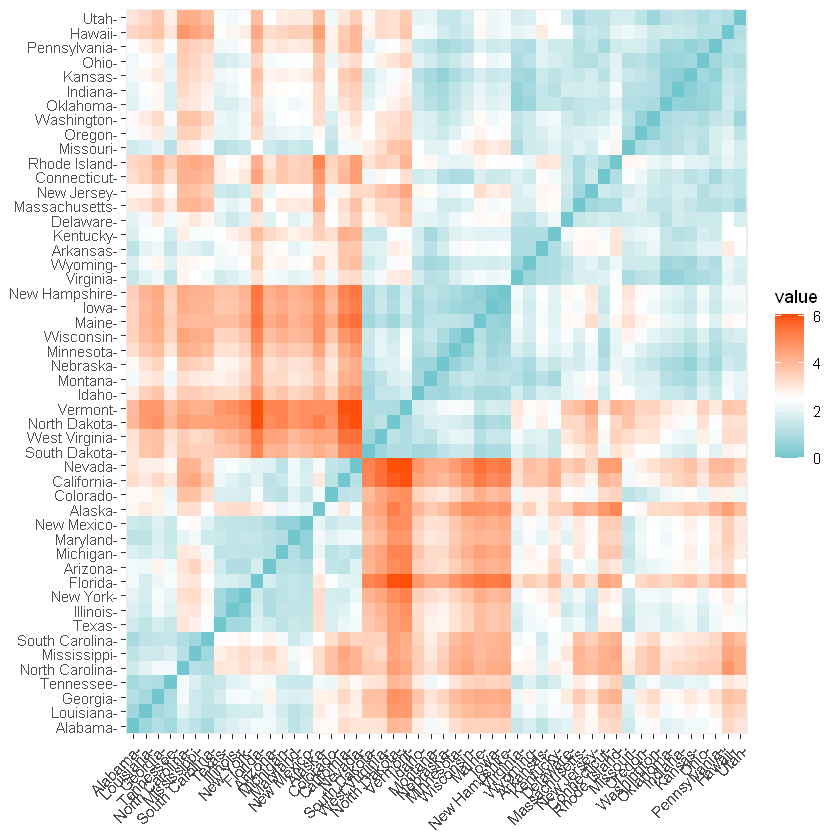

In [ ]:
distance <- get_dist(df)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

## K-Means Clustering

In [ ]:
library(factoextra)

In [ ]:
dim(df)

[1] 50  4

In [ ]:
k2 <- kmeans(df, centers = 2)
str(k2)

List of 9
 $ cluster     : Named int [1:50] 2 2 2 1 2 2 1 1 2 2 ...
  ..- attr(*, "names")= chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ centers     : num [1:2, 1:4] -0.67 1.005 -0.676 1.014 -0.132 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"
 $ totss       : num 196
 $ withinss    : num [1:2] 56.1 46.7
 $ tot.withinss: num 103
 $ betweenss   : num 93.1
 $ size        : int [1:2] 30 20
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


La sortie de k-means une liste avec plusieurs bits d'information. Le plus important étant :

* cluster: Un vecteur d'entiers (à partir de 1:k) indiquant le cluster auquel chaque point est alloué.
* centers: Une matrice de centres de cluster.
* totss: La somme totale des carrés.
* withinss: vecteur de la somme des carrés à l'intérieur d'un cluster, un composant par cluster.
* tot.withinss: Somme totale des carrés à l'intérieur du cluster, c'est-à-dire somme(à l'intérieur).
* betweenss: La somme des carrés entre les clusters, c'est-à-dire $totss-tot.withinss$.
* size: nombre de points dans chaque cluster.

Si nous imprimons les résultats, nous verrons que nos regroupements ont abouti à 2 tailles de cluster de 30 et 20. Nous voyons les centres de cluster (moyennes) pour les deux groupes à travers les quatre variables ( Meurtre, Agression, UrbanPop, Rape ). Nous obtenons également l'affectation du cluster pour chaque observation (c'est-à-dire que l'Alabama a été affecté au cluster 1, l'Arkansas a été affecté au cluster 2, etc.).

In [ ]:
k2

K-means clustering with 2 clusters of sizes 30, 20

Cluster means:
     Murder    Assault   UrbanPop       Rape
1 -0.669956 -0.6758849 -0.1317235 -0.5646433
2  1.004934  1.0138274  0.1975853  0.8469650

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             2              2              2              1              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              1              1              2              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             1              1              2              1              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             1              1              2              1              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             1              2              1              2              2 
       Montana    

Nous pouvons également afficher nos résultats en utilisant fviz_cluster. Cela donne une belle illustration des clusters. S'il y a plus de deux dimensions (variables) fviz_cluster, effectuera une analyse en composantes principales (ACP) et tracera les points de données en fonction des deux premières composantes principales qui expliquent la majorité de la variance.

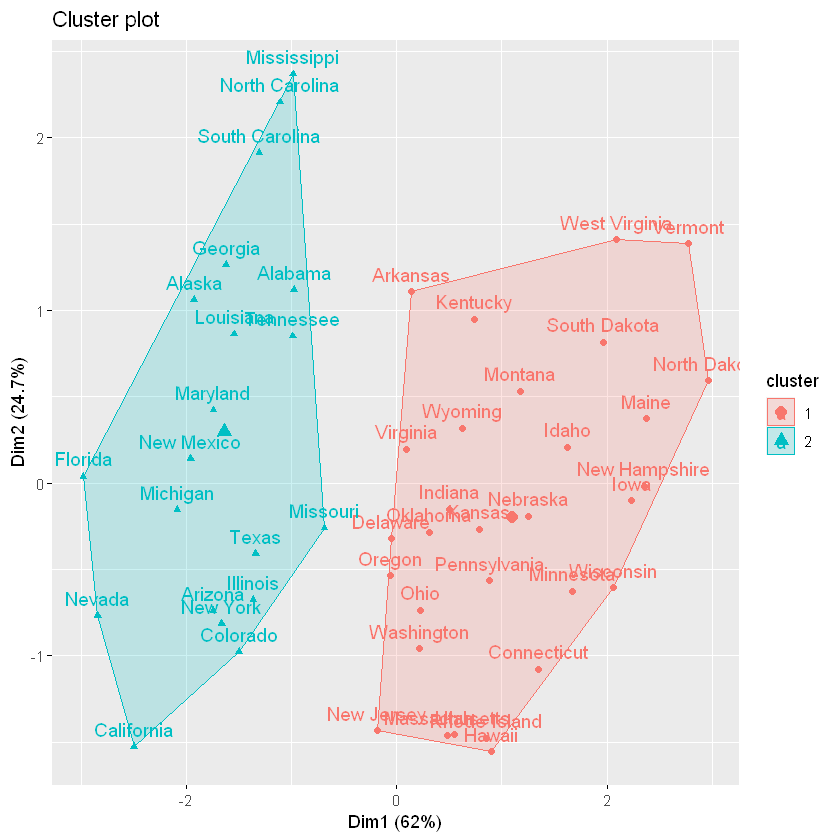

In [ ]:
fviz_cluster(k2, data = df)

## Détermination des clusters optimaux

Étant donné que le nombre de clusters (k) doit être défini avant de démarrer l'algorithme, il est souvent avantageux d'utiliser plusieurs valeurs différentes de k et d'examiner les différences dans les résultats. Nous pouvons exécuter le même processus pour 3, 4 et 5 clusters, et les résultats sont indiqués dans la figure 

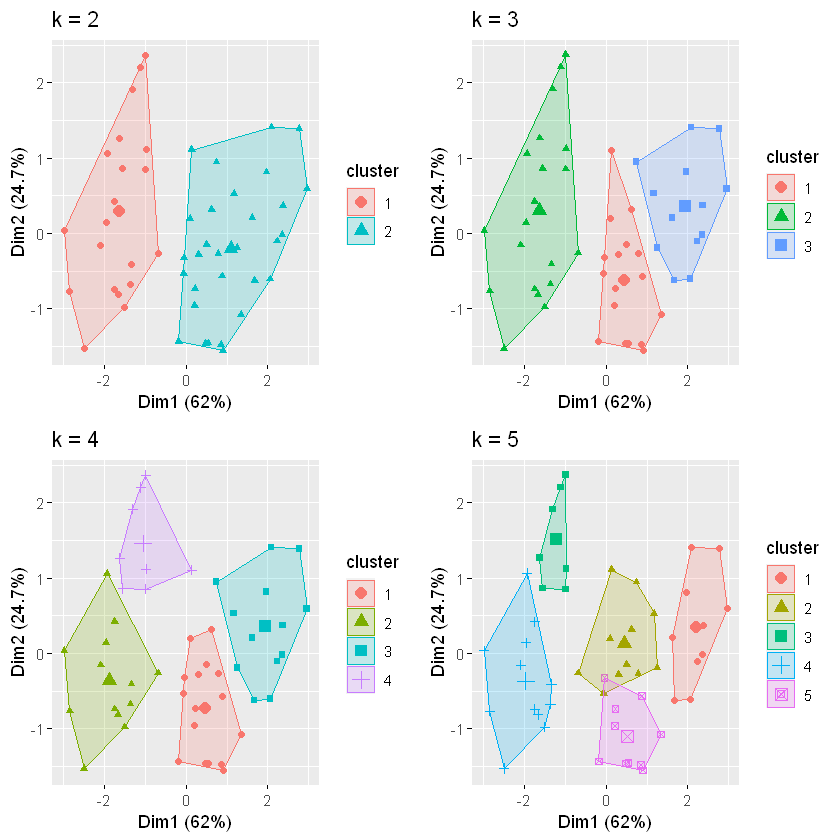

In [ ]:
k3 <- kmeans(df, centers = 3)
k4 <- kmeans(df, centers = 4)
k5 <- kmeans(df, centers = 5)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df) + ggtitle("k = 5")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, nrow = 2)

Bien que cette évaluation visuelle nous indique où se produisent les vraies dilinéations (ou ne se produisent pas, comme les clusters 2 et 4 dans le graphique k = 5) entre les clusters, elle ne nous dit pas quel est le nombre optimal de clusters.

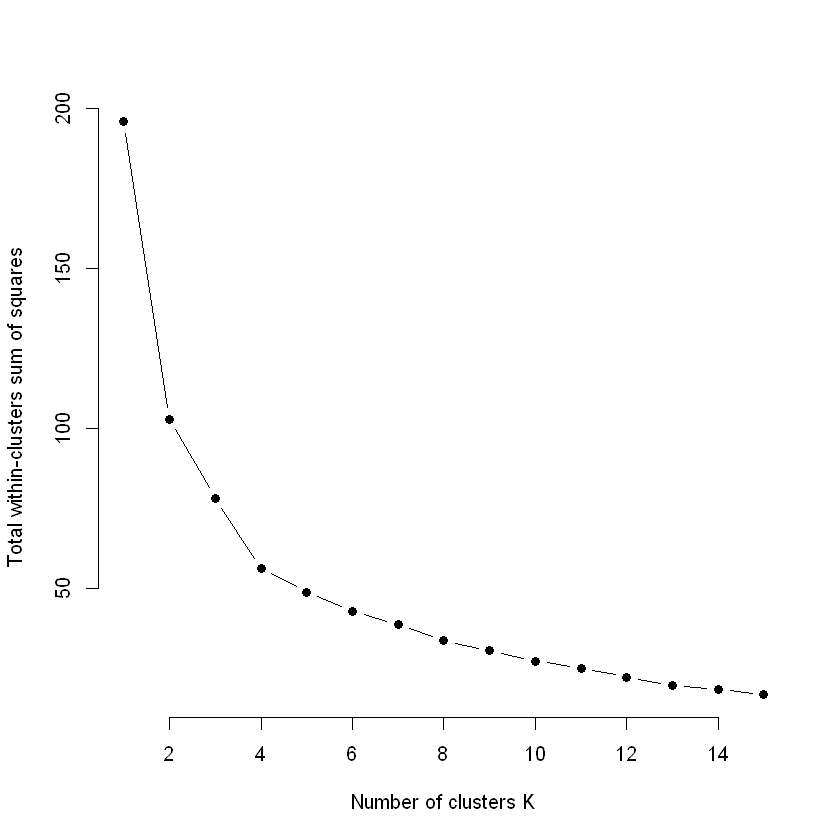

In [ ]:
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(df, k)$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

## Extraction des résultats

puisuqe la méthode de coude donne 4 comme nombre de clusters optimaux, nous pouvons effectuer l'analyse finale et extraire les résultats en utilisant 4 clusters

In [ ]:
# Compute k-means clustering with k = 4
set.seed(123)
final <- kmeans(df, 4)
print(final)

K-means clustering with 4 clusters of sizes 8, 13, 16, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1  1.4118898  0.8743346 -0.8145211  0.01927104
2 -0.9615407 -1.1066010 -0.9301069 -0.96676331
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  0.6950701  1.0394414  0.7226370  1.27693964

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              4              4              1              4 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             4              3              3              4              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              2              4              3              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              2              1              2              4 
 Massachusetts       Michigan      Minnesota    Mississippi    

Nous pouvons visualiser les résultats en utilisant fviz_cluster:

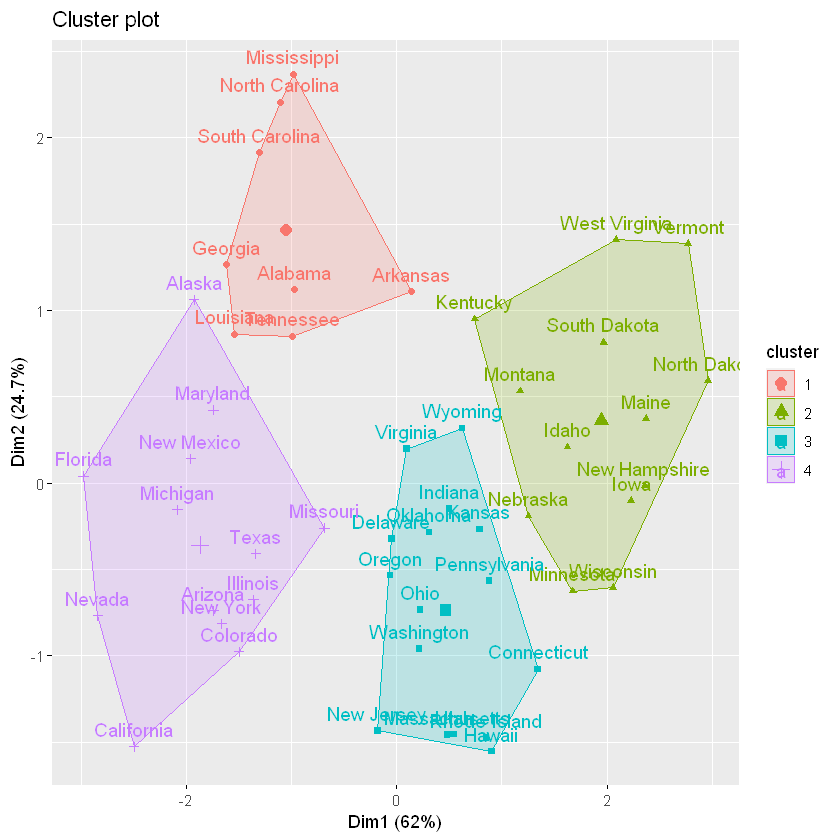

In [ ]:
fviz_cluster(final, data = df)

## Conclusion

Le clustering K-means est un algorithme très simple et rapide. De plus, il peut traiter efficacement des ensembles de données très volumineux.

http://shabal.in/visuals/kmeans/3.html